## **Data Exploration and Cleanup**
 Conduct initial data exploration to understand dataset characteristics.

 Clean the data by handling missing values or anomalies

INFORMATION
   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None 

DATA STATISTICS
           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000 

BEFORE REMOVIN

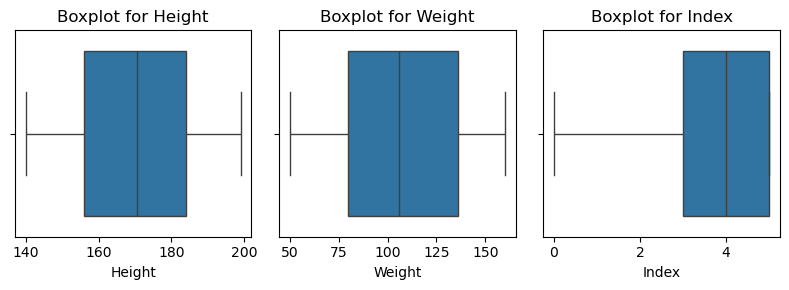

Number of outliers in Height: 0
Number of outliers in Weight: 0
Number of outliers in Index: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        500 non-null    object 
 1   Height        500 non-null    int64  
 2   Weight        500 non-null    int64  
 3   Index         500 non-null    int64  
 4   Index_zscore  500 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 19.7+ KB
None 



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dfset
df = pd.read_csv('bmi.csv')

# Initial Data Exploration
print("INFORMATION")
print(df.head(), "\n") # Top five rows
print(df.info(), "\n") # Basic info
print("DATA STATISTICS")
print(df.describe(), "\n") # Statistical summary

# Data Cleaning (handle missing values and outliers)
print("BEFORE REMOVING MISSING VALUES")
print(df.isnull().sum(), "\n")# Check for missing values
df.dropna(inplace=True)
print("AFTER REMOVING MISSING VALUES")
print(df.isnull().sum(), "\n") # Verify if there're any missing values

# Visualize outliers using boxplots
plt.figure(figsize=(8, 3))

# Boxplot for Height
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Height'])
plt.title('Boxplot for Height')

# Boxplot for Weight
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Weight'])
plt.title('Boxplot for Weight')

# Boxplot for Index
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Index'])
plt.title('Boxplot for Index')

plt.tight_layout()
plt.show()

# Detect outliers using Z-scores
# Calculate Z-scores for height and weight
df['Height_zscore'] = zscore(df['Height'])
df['Weight_zscore'] = zscore(df['Weight'])
df['Index_zscore'] = zscore(df['Index'])

# Flag rows with Z-scores greater than 3 or less than -3 as outliers
height_outliers = df[(df['Height_zscore'] > 3) | (df['Height_zscore'] < -3)]
weight_outliers = df[(df['Weight_zscore'] > 3) | (df['Weight_zscore'] < -3)]
index_outliers = df[(df['Index_zscore'] > 3) | (df['Index_zscore'] < -3)]

print("Number of outliers in Height:", len(height_outliers))
print("Number of outliers in Weight:", len(weight_outliers))
print("Number of outliers in Index:", len(index_outliers), "\n")

"""
# Commented out the code because there're no outliers
# Removing rows where Height or Weight Z-scores are >3 or <-3
df_no_outliers = df[(df['Height_zscore'] <= 3) & (df['Height_zscore'] >= -3) &
                        (df['Weight_zscore'] <= 3) & (df['Weight_zscore'] >= -3)]

# Drop the additional columns used for outlier detection
df_no_outliers = df_no_outliers.drop(columns=['Height_zscore', 'Weight_zscore'])

print("Data shape after removing outliers:", df_no_outliers.shape)

"""
# Drop the additional columns used for outlier detection
df = df.drop(columns=['Height_zscore', 'Weight_zscore'])
# Display cleaned dataset
print(df.info(), "\n")

## **Exploratory Data Analysis (EDA)**
Analyse the distribution of BMI categories and explore the relationship between gender, height, weight, and BMI category.

Investigate gender-specific distributions for height, weight, and BMI categories.

DISTRIBUTION OF BMI CATEGORIES


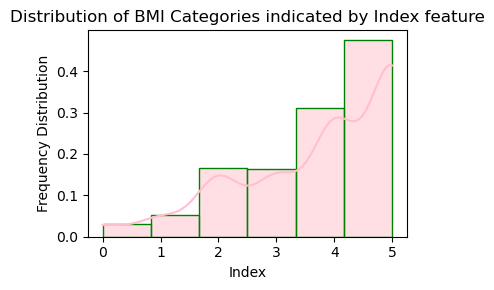

HEAT MAP BETWEEN 'Height', 'Weight' and 'Index' 



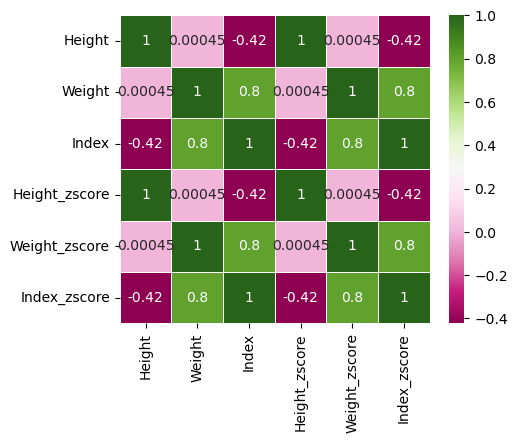

RELATIONSHIPS BETWEEN 'Gender', 'Height', 'Weight' and 'Index' 



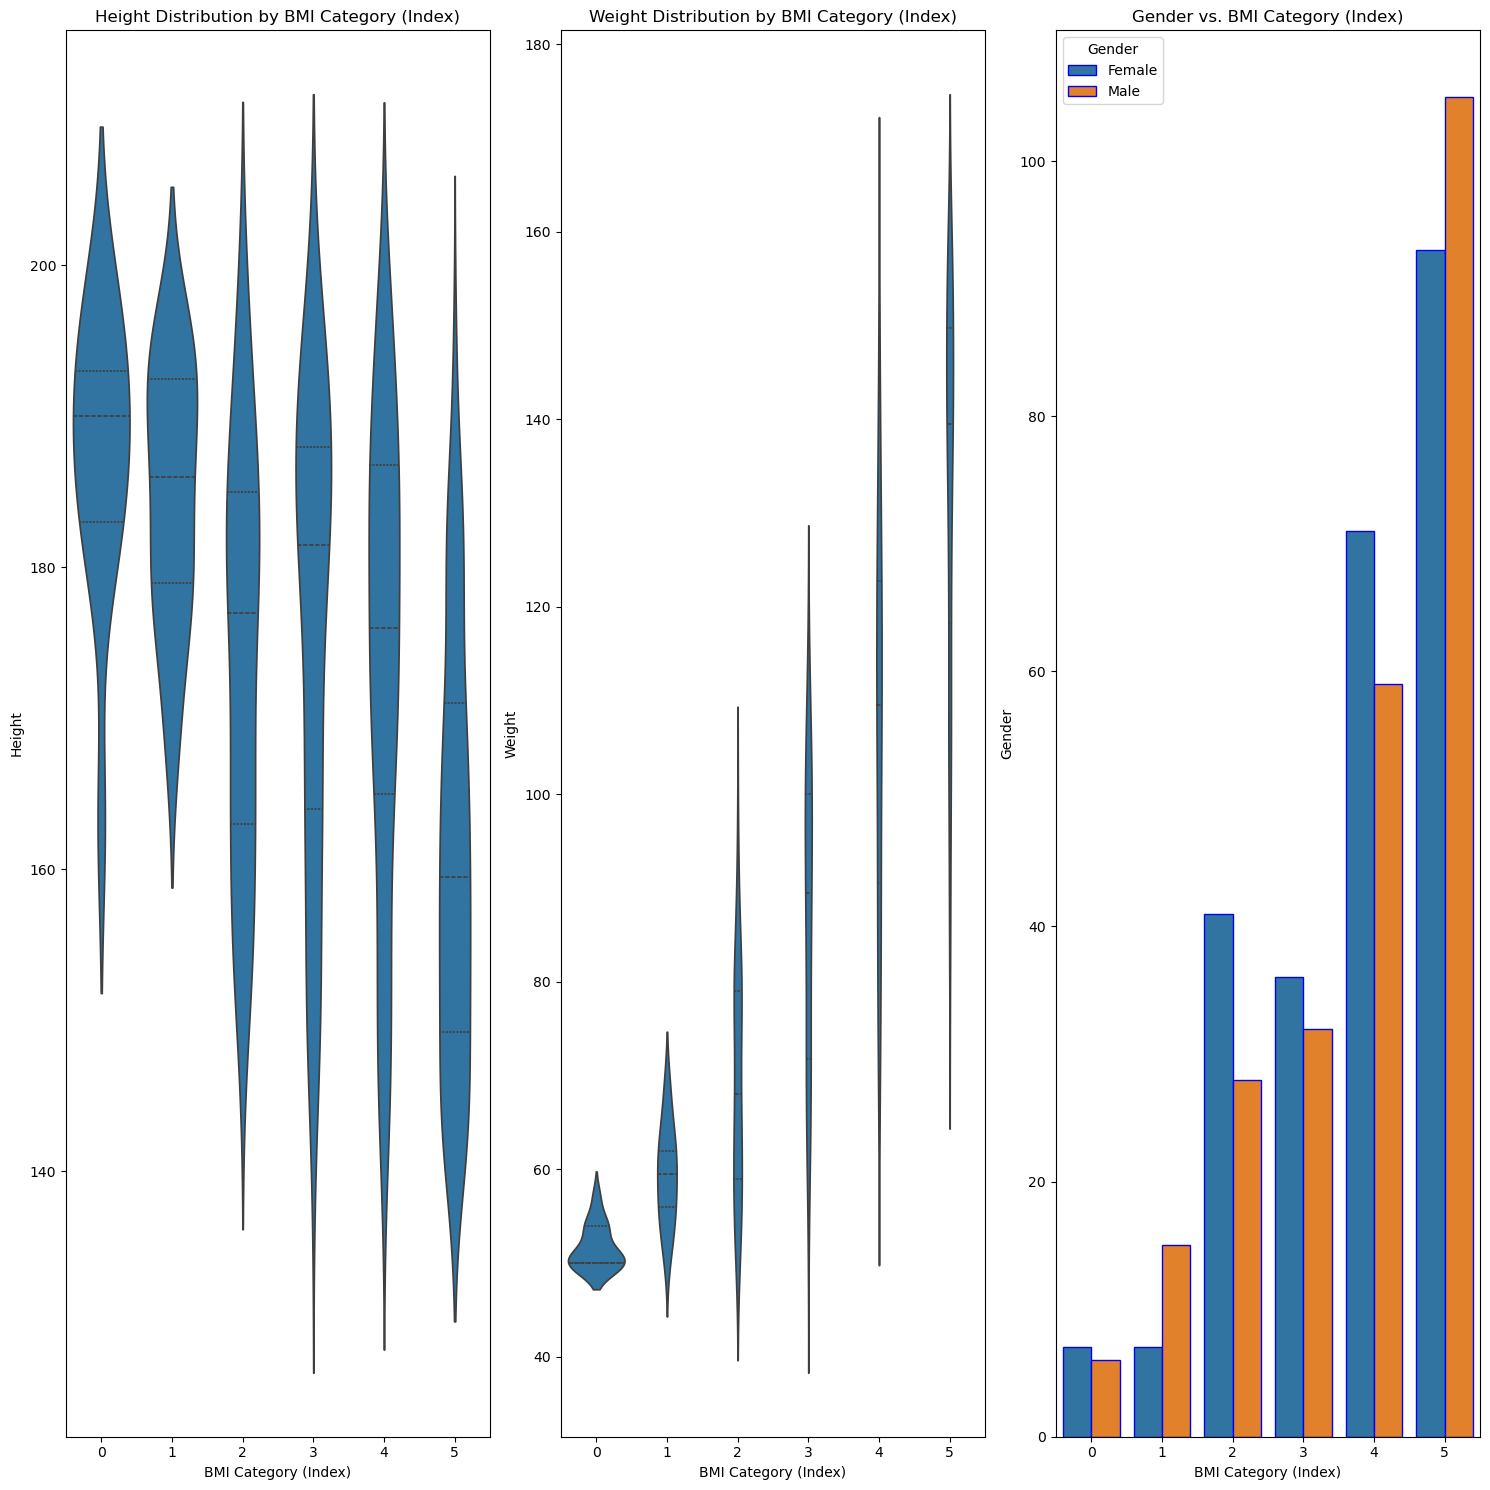


GENDER-SPECIFIC DISTRIBUTIONS OF 'Height', 'Weight' and 'Index'



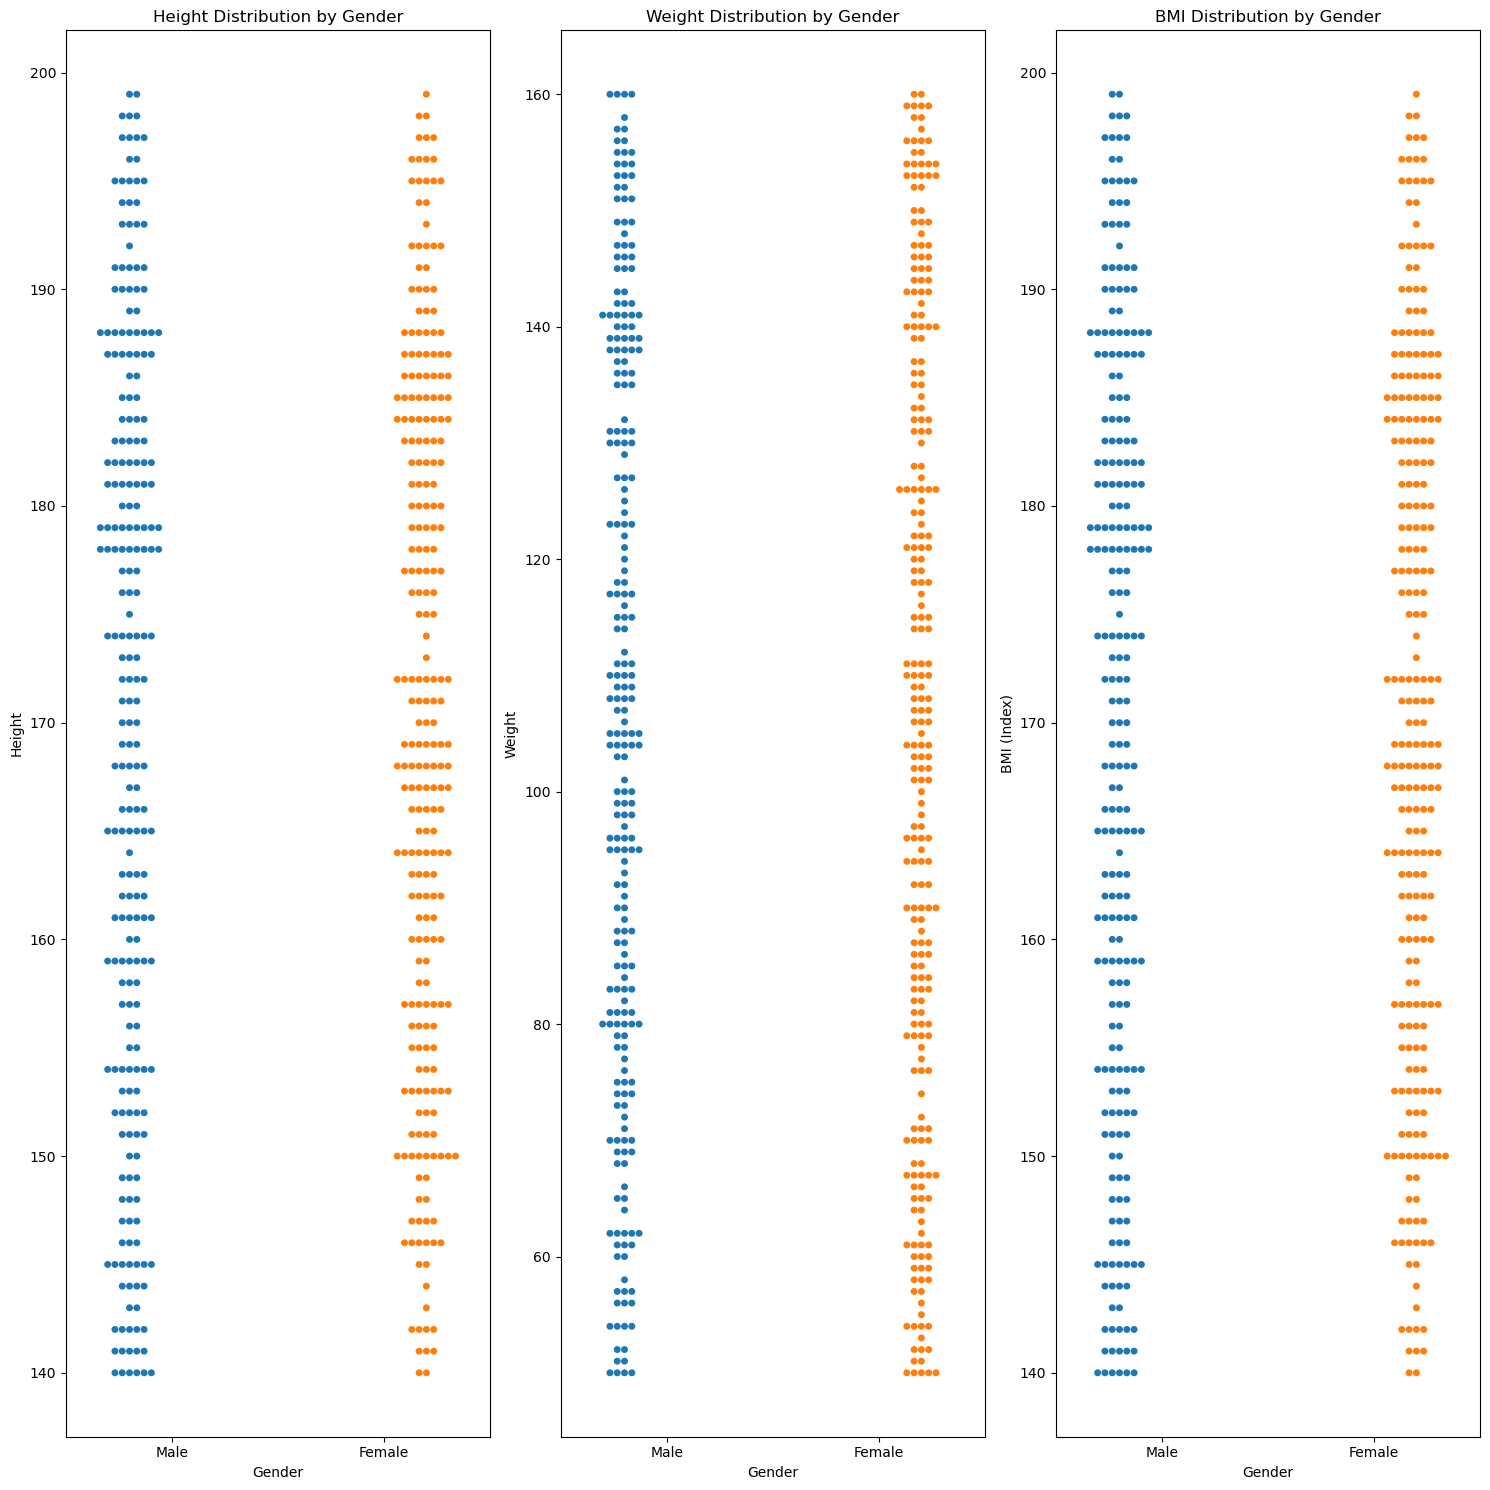

In [4]:
#Exploratory Data Analysis

# Visualize the distribution of BMI categories using "Index" feature
print("DISTRIBUTION OF BMI CATEGORIES")
plt.figure(figsize=(4, 3))
sns.histplot(df['Index'], bins=6, color="pink", edgecolor="green", stat="density", kde=True)
plt.title("Distribution of BMI Categories indicated by Index feature")
plt.ylabel('Frequency Distribution')
plt.tight_layout()
plt.show()

#explore the relationship between gender, height, weight, and BMI category
# Create a heatmap for correlation between numerical columns
print("HEAT MAP BETWEEN \'Height\', \'Weight\' and \'Index\' \n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(df.corr(numeric_only=True),
            annot = True, cmap='PiYG', linewidth = 0.5);
plt.show()

# Create plots with gender, height and weight vs index respectively
print("RELATIONSHIPS BETWEEN \'Gender\', \'Height\', \'Weight\' and \'Index\' \n")
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
# 1. Violin Plot for Height Distribution by BMI Category
sns.violinplot(data=df, x='Index', y='Height', ax=axes[0], inner="quartile")
axes[0].set_title("Height Distribution by BMI Category (Index)")
axes[0].set_ylabel('Height')
axes[0].set_xlabel('BMI Category (Index)')
# 2. Violin Plot for Weight Distribution by BMI Category
sns.violinplot(data=df, x='Index', y='Weight', ax=axes[1], inner="quartile")
axes[1].set_title("Weight Distribution by BMI Category (Index)")
axes[1].set_ylabel('Weight')
axes[1].set_xlabel('BMI Category (Index)')
# 3. Count Plot for Gender vs. BMI Category
sns.countplot(data=df, x='Index', hue='Gender', ax=axes[2], edgecolor="blue")
axes[2].set_title("Gender vs. BMI Category (Index)")
axes[2].set_ylabel('Gender')
axes[2].set_xlabel('BMI Category (Index)')
fig.tight_layout()
plt.show()

#gender-specific distributions for height, weight, and BMI categories
print("\nGENDER-SPECIFIC DISTRIBUTIONS OF \'Height\', \'Weight\' and \'Index\'\n")
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
# 1. Swarm Plot for Height by Gender
sns.swarmplot(data=df, x='Gender', y='Height', ax=axes[0], hue="Gender", dodge=True)
axes[0].set_title("Height Distribution by Gender")
axes[0].set_ylabel('Height')
axes[0].set_xlabel('Gender')
# 2. Swarm Plot for Weight by Gender
sns.swarmplot(data=df, x='Gender', y='Weight', ax=axes[1], hue="Gender", dodge=True)
axes[1].set_title("Weight Distribution by Gender")
axes[1].set_ylabel('Weight')
axes[1].set_xlabel('Gender')
# 3. Swarm Plot for BMI Index by Gender
sns.swarmplot(data=df, x='Gender', y='Height', ax=axes[2], hue="Gender", dodge=True)
axes[2].set_title("BMI Distribution by Gender")
axes[2].set_ylabel('BMI (Index)')
axes[2].set_xlabel('Gender')
fig.tight_layout()
plt.show()


## **Data Preprocessing**
Implement strategies to manage imbalanced data, such as oversampling, undersampling, or applying SMOTE.

Normalize or standardize height and weight features for better model performance.

In [6]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Convert categorical object datatype to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Define features and target variable
# Predictors
X = df[['Gender', 'Height', 'Weight']]
# Predictable 
y = df['Index']

# Split data frame into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['Gender'])

# Feature Scaling (only for Height and Weight)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['Height', 'Weight']] = scaler.fit_transform(X_train[['Height', 'Weight']])
X_test_scaled[['Height', 'Weight']] = scaler.transform(X_test[['Height', 'Weight']])

# Manage imbalanced data using SMOTE
print("Class distribution before balancing the data:")
print(y_train.value_counts())

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Check the new class distribution
print("\nBalanced class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())


Class distribution before balancing the data:
Index
5    160
4    100
3     58
2     52
1     19
0     11
Name: count, dtype: int64

Balanced class distribution after SMOTE:
Index
2    160
4    160
3    160
5    160
0    160
1    160
Name: count, dtype: int64


## **Model Training and Prediction**

Divide the dataset into training and testing sets, ensuring gender representation is balanced in both.

Train classification models (e.g., Logistic Regression, SVM and KNN) and make predictions on BMI categories.

Gender-Specific Modeling: Train separate models for each gender to evaluate if model performance improves when predicting BMI categories within gender groups.

In [9]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#Train classification models (Logistic Regression, SVM and KNN) and make predictions on BMI categories.

# Logistic Regression
lr = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'max_iter': [1000, 2000, 5000, 10000],
    'class_weight': [None, 'balanced']
}
lr_hp_params = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1, verbose=1) # Hyperparameter Tuning
lr_hp_params.fit(X_train_balanced, y_train_balanced)
lr_hp_tuning = lr_hp_params.best_estimator_
lr_pred = lr_hp_tuning.predict(X_test_scaled)
# Support Vector Machine (SVM)
svm = SVC()
svm_hp_params = GridSearchCV(svm, {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}, cv=5) # Hyperparameter Tuning
svm_hp_params.fit(X_train_balanced, y_train_balanced)
svm_hp_tuning = svm_hp_params.best_estimator_
svm_pred = svm_hp_tuning.predict(X_test_scaled)
# K-Nearest Neighbors (KNN) - Initially with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn_hp_params = GridSearchCV(knn, {'n_neighbors': [3, 5, 7, 11, 13]}, cv=5) # Hyperparameter Tuning
knn_hp_params.fit(X_train_balanced, y_train_balanced)
knn_hp_tuning = knn_hp_params.best_estimator_
knn_pred = knn_hp_tuning.predict(X_test_scaled)

# Gender-Specific Modeling
for i_sex in [0, 1]:
    # Filter data for the specific gender
    X_gender = X[X['Gender'] == i_sex]
    y_gender = y[X['Gender'] == i_sex]
    
    # Split the gender-specific data
    X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X_gender, y_gender, test_size=0.2, random_state=42)
    
    # Feature Scaling
    X_train_gender_scaled = scaler.fit_transform(X_train_gender)
    X_test_gender_scaled = scaler.transform(X_test_gender)

    # Apply SMOTE
    smote_gender = SMOTE(random_state=42, k_neighbors=3)
    X_train_gender_balanced, y_train_gender_balanced = smote_gender.fit_resample(X_train_gender_scaled, y_train_gender)

    #Train classification models (Logistic Regression, SVM and KNN) and make predictions on BMI categories.
    # Logistic Regression
    lr_sex = LogisticRegression()
    lr_sex_hp_params = GridSearchCV(lr_sex, param_grid, cv=5)
    lr_sex_hp_params.fit(X_train_gender_balanced, y_train_gender_balanced)
    lr_sex_hp_tuning = lr_sex_hp_params.best_estimator_
    lr_sex_pred = lr_sex_hp_tuning.predict(X_test_gender_scaled)
    # Support Vector Machine (SVM)
    svm_sex = SVC()
    svm_sex_hp_params = GridSearchCV(svm_sex, {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}, cv=5)
    svm_sex_hp_params.fit(X_train_gender_balanced, y_train_gender_balanced)
    svm_sex_hp_tuning = svm_sex_hp_params.best_estimator_
    svm_sex_pred = svm_sex_hp_tuning.predict(X_test_gender_scaled) 
    # K-Nearest Neighbors (KNN) - Initially with K=5
    n_neighbors = min(5, len(y_train_gender_balanced) - 1)
    knn_sex = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_sex_hp_params = GridSearchCV(knn_sex, {'n_neighbors': [3, 5, 7, 11, 13]}, cv=5)
    knn_sex_hp_params.fit(X_train_gender_balanced, y_train_gender_balanced)
    knn_sex_hp_tuning = knn_sex_hp_params.best_estimator_
    knn_sex_pred = knn_sex_hp_tuning.predict(X_test_gender_scaled)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


## **BMI Category Prediction with User inputs**

In [22]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# Method to manually predict using generic modelling
def predict_bmi_generic_models(gender, height, weight):
    
    new_data = pd.DataFrame([[gender, height, weight]], columns=['Gender', 'Height', 'Weight'])
    
    # Evaluate performance of each model
    lr_pred = lr_hp_tuning.predict(new_data)
    svm_pred = svm_hp_tuning.predict(new_data)
    knn_pred = knn_hp_tuning.predict(new_data)
    
    # Calculate accuracies
    lr_accuracy = accuracy_score([lr_pred], [gender]) 
    svm_accuracy = accuracy_score([svm_pred], [gender])
    knn_accuracy = accuracy_score([knn_pred], [gender])
    
    # Select the best model based on accuracy
    accuracies = {'Logistic Regression': lr_accuracy, 'SVM': svm_accuracy, 'KNN': knn_accuracy}
    best_model_name = max(accuracies, key=accuracies.get)
    
    # Output the best model and prediction
    if best_model_name == 'Logistic Regression':
        best_model = lr_hp_tuning
    elif best_model_name == 'SVM':
        best_model = svm_hp_tuning
    else:
        best_model = knn_hp_tuning
    
    # Make prediction using the best model
    best_prediction = best_model.predict(new_data)
    
    #print(f"The best model is: {best_model_name}")
    print(f"Prediction of BMI Category using Generic modelling = {best_prediction[0]}")
    print("\n------------------------------------------------------------------\n")
    
# Manually input new data
gender = int(input("Enter the gender (male: 0, female: 1): "))
height = float(input("Enter the height in cm: "))
weight = float(input("Enter the weight in kg: "))

# Call the function to predict using all models
predict_bmi_generic_models(gender, height, weight)

# Method to manually predict using gender specific modelling
def predict_bmi_gender_specific(gender, height, weight):
    
    new_data = pd.DataFrame([[gender, height, weight]], columns=['Gender', 'Height', 'Weight'])
    
    # Evaluate performance of each gender-specific model
    if gender == 1:  # Female
        lr_pred = lr_sex_hp_tuning.predict(new_data)
        svm_pred = svm_sex_hp_tuning.predict(new_data)
        knn_pred = knn_sex_hp_tuning.predict(new_data)
        
        # Calculate accuracies for each model
        lr_accuracy = accuracy_score([lr_pred], [gender])
        svm_accuracy = accuracy_score([svm_pred], [gender])
        knn_accuracy = accuracy_score([knn_pred], [gender])
    else:  # Male
        lr_pred = lr_hp_tuning.predict(new_data)
        svm_pred = svm_hp_tuning.predict(new_data)
        knn_pred = knn_hp_tuning.predict(new_data)
        
        # Calculate accuracies for each model
        lr_accuracy = accuracy_score([lr_pred], [gender])
        svm_accuracy = accuracy_score([svm_pred], [gender])
        knn_accuracy = accuracy_score([knn_pred], [gender])
    
    # Select the best model based on accuracy (or any other metric)
    accuracies = {'Logistic Regression': lr_accuracy, 'SVM': svm_accuracy, 'KNN': knn_accuracy}
    best_model_name = max(accuracies, key=accuracies.get)
    
    # Output the best model and prediction
    if best_model_name == 'Logistic Regression':
        best_model = lr_sex_hp_tuning if gender == 1 else lr_hp_tuning
    elif best_model_name == 'SVM':
        best_model = svm_sex_hp_tuning if gender == 1 else svm_hp_tuning
    else:
        best_model = knn_sex_hp_tuning if gender == 1 else knn_hp_tuning
    
    # Make prediction using the best model
    best_prediction = best_model.predict(new_data)
    
    #print(f"The best model for {'Female' if gender == 1 else 'Male'} is: {best_model_name}")
    print(f"Prediction of BMI Category using Gender Specific modelling = {best_prediction[0]}")

# Manually input new data
gender = int(input("Enter the gender (male: 0, female: 1): "))
height = float(input("Enter the height in cm: "))
weight = float(input("Enter the weight in kg: "))

# Call the function to predict using gender-specific models (without feature scaling)
predict_bmi_gender_specific(gender, height, weight)

Enter the gender (male: 0, female: 1):  0
Enter the height in cm:  170
Enter the weight in kg:  50


Prediction of BMI Category using Generic modelling = 1

------------------------------------------------------------------



Enter the gender (male: 0, female: 1):  0
Enter the height in cm:  170
Enter the weight in kg:  50


Prediction of BMI Category using Gender Specific modelling = 1


## **Model Evaluation and Comparison**
Utilize metrics such as Accuracy, Precision, Recall, and F1 Score for model evaluation.

Compare model performances across the general and gender-specific models to assess differences in predictive accuracies or other metrics

In [16]:
# import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluation
# General Model
print("\nEvaluating Model:")
def evaluate_model(y_test, predictions, model_name, best_params):
    print(f"Model: {model_name}", "\n")
    print("Best Hyperparameters:", best_params, "\n")
    print(f"Accuracy Score: {accuracy_score(y_test, predictions):.2f}\n")
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions), "\n")
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("------------------------------------------------------")

evaluate_model(y_test, lr_pred, "LOGISTIC REGRESSION", lr_hp_params.best_params_)
print("\n")
evaluate_model(y_test, svm_pred, "SUPPORT VECTOR MACHINE", svm_hp_params.best_params_)
print("\n")
evaluate_model(y_test, knn_pred, "K NEAREST NEIGHBOURS", knn_hp_params.best_params_)

# Gender-Specific Modeling
print("\nEvaluating Gender-Specific Model:")
for i_sex in [0, 1]:
    print(f"\nEvaluating models for {'Male' if i_sex == 0 else 'Female'}:")
    # Logistic Regression
    evaluate_model(y_test_gender, lr_sex_pred, "LOGISTIC REGRESSION", lr_sex_hp_params.best_params_)
    # Support Vector Machine (SVM)
    evaluate_model(y_test_gender, svm_sex_pred, "SUPPORT VECTOR MACHINE", svm_sex_hp_params.best_params_)  
    # K-Nearest Neighbors (KNN) - Initially with K=5
    evaluate_model(y_test_gender, knn_sex_pred, "K NEAREST NEIGHBOURS", knn_sex_hp_params.best_params_)



Evaluating General Model:
Model: LOGISTIC REGRESSION 

Best Hyperparameters: {'C': 100, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'} 

Accuracy Score: 0.91

Confusion Matrix:
 [[ 2  0  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  1 14  2  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  4 26  0]
 [ 0  0  0  0  2 36]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.75      1.00      0.86         3
           2       1.00      0.82      0.90        17
           3       0.62      1.00      0.77        10
           4       0.93      0.87      0.90        30
           5       1.00      0.95      0.97        38

    accuracy                           0.91       100
   macro avg       0.88      0.94      0.90       100
weighted avg       0.93      0.91      0.91       100

------------------------------------------------------


Model: SUPPORT VECTOR MACHINE 

Best Hy